In [68]:
#импортируем модули
import pandas as pd
import os
import seaborn as sns

In [51]:
#записываем в переменную путь где находится папка со всеми значениями
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/shared/homeworks/python_ds_miniprojects/4/data/'

In [139]:
#создаем dataframe с колонками, которые нам нужны
all_data = pd.DataFrame(columns=['date', 'name', 'product_id', 'quantity' ])
all_data

,date,name,product_id,quantity


In [140]:
#делаем цикл, с помощью которого заходит в каждую папку и считываются данные 
for date in os.listdir(path_to_file):
    for name in os.listdir(path_to_file+date+'/'):
        for info in os.listdir(path_to_file + date + '/' + name):
            df = pd.read_csv(path_to_file + date + '/' + name+ '/' + info) #заходит в папку и там считывает файл с помощью pd.read_csv
            df['date'] = date
            df['name'] = name
            all_data = pd.concat([df, all_data]) #добавляем полученный датафрэйм в нужный нам дата фрэйм
            
        
    

In [141]:
all_data = all_data.drop(['Unnamed: 0'], axis = 1) #удаляем лишний столбец

In [136]:
all_data.quantity.sum() #суммируем значения в столбце quantity

480

In [142]:
#смотрим первые 5 значений
all_data.head()

,product_id,quantity,date,name
0,95,2,2020-12-07,Vasiliy_Ivanov
1,83,3,2020-12-07,Vasiliy_Ivanov
2,64,1,2020-12-07,Vasiliy_Ivanov
0,18,4,2020-12-07,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov


In [143]:
#Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке

all_data.groupby('name', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)\
    .head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [65]:
#Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot)
top_10_products = all_data.groupby('product_id', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head(10)

In [67]:
top_10_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


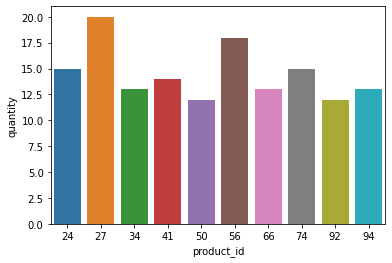

In [72]:
#строим диаграму, x - product_id, y - quantity
sns.barplot(data=top_10_products, x='product_id', y='quantity')

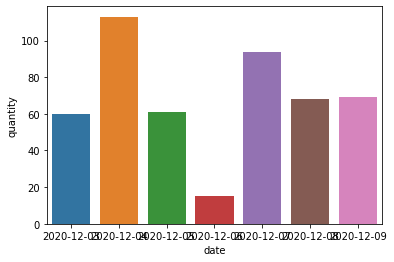

In [151]:
#Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

date_sales = all_data.groupby('date', as_index=False) \
    .agg({'quantity': 'sum'})

sns.barplot(data=date_sales, x='date', y='quantity')

In [150]:
#Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 
all_data_new = all_data.drop_duplicates(subset=['date', 'product_id', 'name'])
all_data_new.groupby(['name', 'product_id'], as_index=False)\
    .agg({'date':'count'}) \
    .query('date > 1')
    

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
